# Retention Study - Figuring Out Which Employees May Quit
### Loading our Main HR Database Records

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("hr_data.csv")

In [4]:
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [5]:
data.shape

(14999, 9)

In [43]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [44]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [45]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [11]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# Loading a employment satisfaction data

In [12]:
file_name = "employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [13]:
main_data = data.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))

In [16]:
main_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [15]:
main_data.shape

(14999, 10)

In [18]:
main_data.isnull().sum()

number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [19]:
main_data.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
main_data.fillna(main_data.mean(), inplace=True)

In [21]:
main_data.isnull().sum()

number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [26]:
main_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [29]:
main_data.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'department',
       'salary', 'satisfaction_level', 'last_evaluation'],
      dtype='object')

In [30]:
main_data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [31]:
main_data['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

# Displying a correlation matrix

In [32]:
import matplotlib.pyplot as plt


No handles with labels found to put in legend.


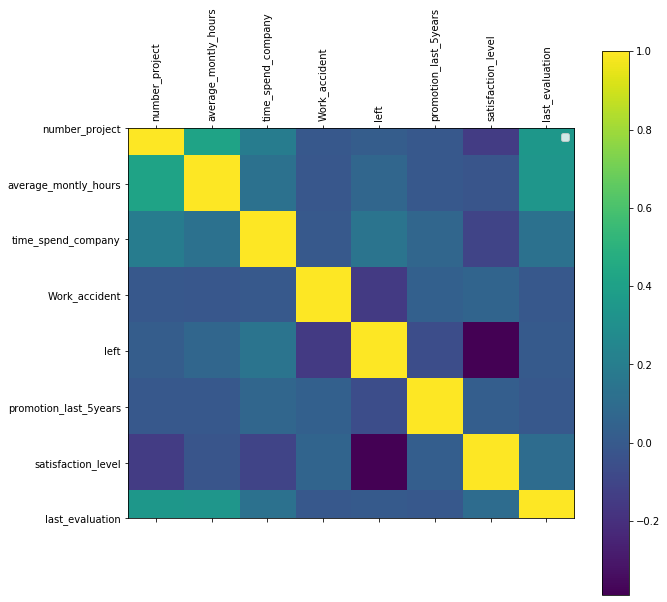

In [34]:
def plot_corr(data, size=10):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax= ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(main_data)    

In [35]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_data = pd.get_dummies(main_data, columns=categorial, drop_first=True)
main_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
employee_id,,,,,,,,,,,,,,,,,,,
1003,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1005,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
1486,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
1038,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
1057,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [37]:
len(main_data.columns)

19

In [38]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 1003 to 87684
Data columns (total 19 columns):
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-nu

# Preparing our dataset for ML

In [39]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_data.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_data['left'].values

In [40]:
X.shape

(14999, 18)

In [41]:
y.shape

(14999,)

In [42]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Let's train a Logistic Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.22%
[[3151  227]
 [ 753  369]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3378
           1       0.62      0.33      0.43      1122

    accuracy                           0.78      4500
   macro avg       0.71      0.63      0.65      4500
weighted avg       0.76      0.78      0.76      4500



# Let's try a Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.62%
[[3369    9]
 [  53 1069]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3378
           1       0.99      0.95      0.97      1122

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Can Deep Learning make a Difference

In [49]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 2s 174us/sample - loss: 0.4176 - acc: 0.7979 - val_loss: 0.3138 - val_acc: 0.8304
Epoch 2/25
10499/10499 [==============================] - 1s 137us/sample - loss: 0.2707 - acc: 0.8502 - val_loss: 0.2534 - val_acc: 0.8536
Epoch 3/25
10499/10499 [==============================] - 1s 137us/sample - loss: 0.2286 - acc: 0.9042 - val_loss: 0.2274 - val_acc: 0.9407
Epoch 4/25
10499/10499 [==============================] - 1s 134us/sample - loss: 0.2058 - acc: 0.9480 - val_loss: 0.2097 - val_acc: 0.9484
Epoch 5/25
10499/10499 [==============================] - 1s 134us/sample - loss: 0.1913 - acc: 0.9509 - val_loss: 0.1992 - val_acc: 0.9567
Epoch 6/25
10499/10499 [==============================] - 1s 136us/sample - loss: 0.1809 - acc: 0.9543 - val_loss: 0.1899 - val_acc: 0.9540
Epoch 7/25
10499/10499 [==============================] - 2s 163us/sample - loss: 0.1744 - acc: 0.9562 - val_lo

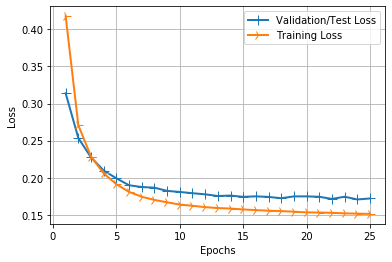

In [52]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Displaying the Classification report and Confusion Matrix

In [56]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3293   85]
 [ 116 1006]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3378
           1       0.92      0.90      0.91      1122

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

